In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from help_functions_non_njit import *

In [ ]:
df = pd.read_csv('Data/overlevelse_ssh.csv')

In [10]:
df

,alder,survival_Mean,predicted
0,1,0.999521,0.999038
1,2,0.999469,0.999018
2,3,0.999501,0.998995
3,4,0.999357,0.998969
4,5,0.999420,0.998939
...,...,...,...
64,65,0.738869,0.746221
65,66,0.722397,0.722986
66,67,0.701526,0.698477
67,68,0.679288,0.672776


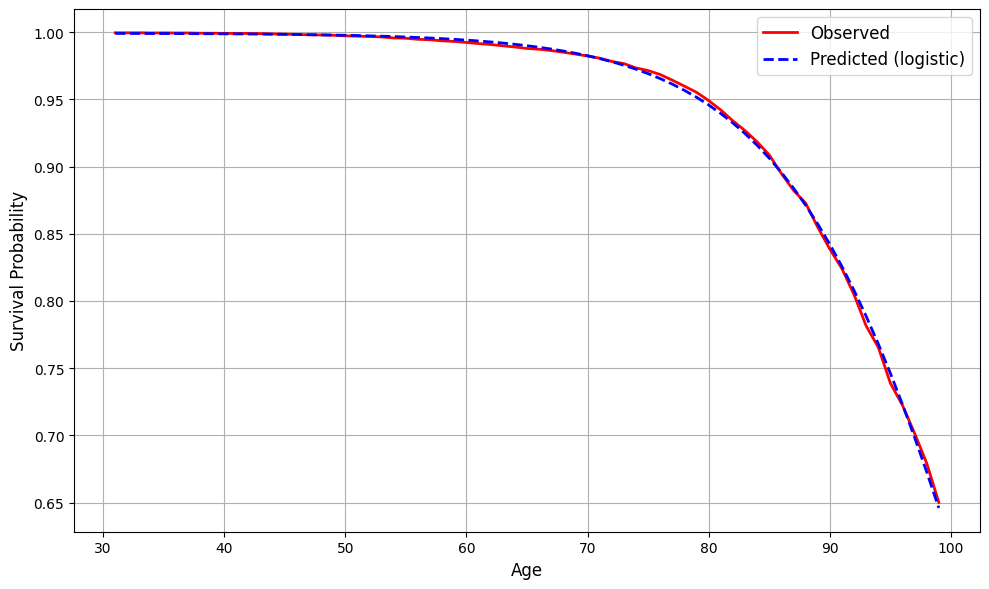

In [21]:
L = 0.9992 # fra regression og data i sas
f = -0.1195 # fra regression og data i sas
x0 = 74.0520 # fra regression og data i sas

df['predicted'] = logistic(df['alder'],L, f, x0)  


# Create a single, nice-looking plot
plt.figure(figsize=(10, 6))
plt.plot(df['alder']+30, df['survival_Mean'], label='Observed', color='red', linewidth=2)
plt.plot(df['alder']+30, df['predicted'], label='Predicted (logistic)', color='blue', linestyle='--', linewidth=2)

# Style it
plt.xlabel('Age', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Optional: save to file
plt.savefig("andet/pictures/conditional_survival_fit.png")

plt.show()

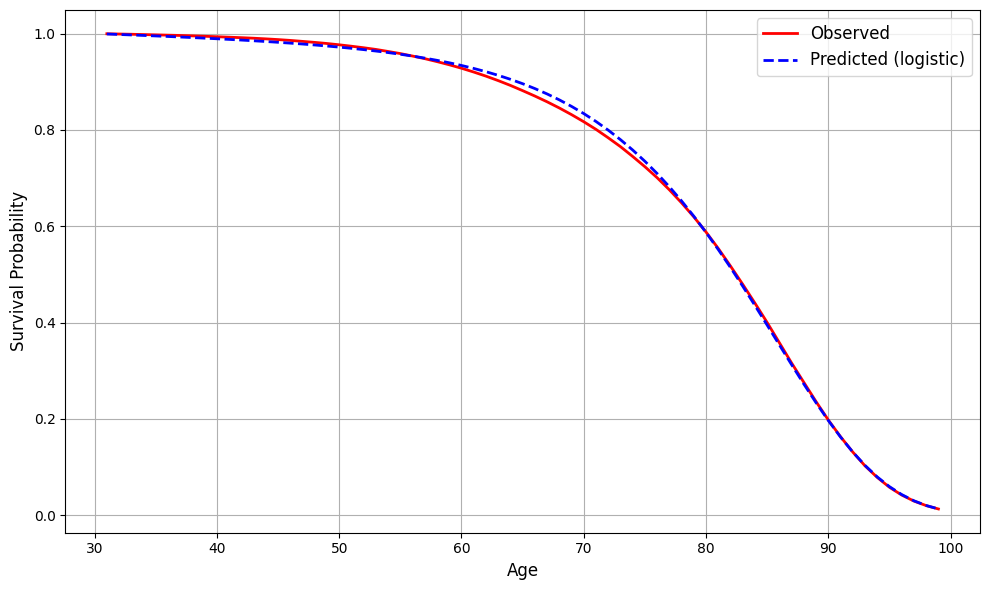

In [22]:
df['observed_unconditional'] = np.cumprod(df['survival_Mean'])
df['predicted_unconditional'] = np.cumprod(df['predicted'])

# Create a single, nice-looking plot
plt.figure(figsize=(10, 6))
plt.plot(df['alder']+30, df['observed_unconditional'], label='Observed', color='red', linewidth=2)
plt.plot(df['alder']+30, df['predicted_unconditional'], label='Predicted (logistic)', color='blue', linestyle='--', linewidth=2)

# Style it
plt.xlabel('Age', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Optional: save to file
plt.savefig("andet/pictures/unconditional_survival_fit.png")

plt.show()